## 1st Assignment - Investment Analysis ##

### Three files given ###
- companies
- rounds2
- mapping

In [129]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

Let's go ahead and load the datasets given

In [130]:
companies = pd.read_csv(r"companies.txt", sep='\t', encoding = "ISO-8859-1")
rounds2   = pd.read_csv(r"rounds2.csv",sep=',', encoding = "ISO-8859-1")
mappings  = pd.read_csv(r"mapping.csv",sep=',', encoding = "ISO-8859-1")

In [131]:
mappings['category_list']=mappings['category_list'].str.replace('0','na')
#[x for x in mappings['category_list'] if '0' in str(x)]
 

In [132]:
category_dict={col:list(mappings[mappings[col]==1]['category_list']) for col in mappings.columns}

In [133]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [134]:
print('shape of companies df', companies.shape)
print('shape of rounds2 df',rounds2.shape)
print('shape of mappings df',mappings.shape)

shape of companies df (66368, 10)
shape of rounds2 df (114949, 6)
shape of mappings df (688, 10)


Cleaning up the rounds2 and companies 

In [135]:
companies['permalink'].replace(regex=True, inplace=True, to_replace=r'[^0-9 A-Z a-z.\-]', value=r'')
rounds2['company_permalink'].replace(regex=True, inplace=True, to_replace=r'[^0-9 A-Z a-z.\-]', value='')

In [136]:
rounds2['lower_company_permalink']= rounds2['company_permalink'].apply(lambda x: x.lower())
companies['lower_permalink']= companies['permalink'].apply(lambda x: x.lower())

Unique number of companies in each file

In [36]:
print('unique company name in "companies" df',len(companies.lower_permalink.unique()))
print('unique company name in "rounds2" df',len(rounds2.lower_company_permalink.unique()))

unique company name in "companies" df 66368
unique company name in "rounds2" df 66368



### In companies DF, permalink is unique  

In [137]:
print('companies in the rounds2 file which are not present in companies:',len(rounds2[~rounds2['lower_company_permalink'].isin(companies['lower_permalink'])]))

companies in the rounds2 file which are not present in companies: 0


In [138]:
# print('companies file')
# companies.head(5)
# print('rounds2 file')
# rounds2.head(5)
# print('mappings file')
# mappings.head(5)

#### Missing value for 'Companies' #### 

In [39]:
vars_with_na = [var for var in companies.columns if companies[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(companies[var].isnull().mean(), 3),  ' % missing values')

homepage_url 0.076  % missing values
category_list 0.047  % missing values
country_code 0.105  % missing values
state_code 0.129  % missing values
region 0.121  % missing values
city 0.121  % missing values
founded_at 0.229  % missing values


#### Missing value for 'rounds2' ####

In [40]:
vars_with_na = [var for var in rounds2.columns if rounds2[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(rounds2[var].isnull().mean(), 3),  ' % missing values')

funding_round_code 0.729  % missing values
raised_amount_usd 0.174  % missing values


In [41]:
companies.isnull().sum()
rounds2.isnull().sum()

permalink              0
name                   1
homepage_url        5058
category_list       3148
status                 0
country_code        6958
state_code          8547
region              8030
city                8028
founded_at         15221
lower_permalink        0
dtype: int64

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
lower_company_permalink        0
dtype: int64

### Master Frame

In [139]:
master_frame = pd.merge(rounds2,companies, left_on='lower_company_permalink', right_on='lower_permalink', how='inner')

In [140]:
master_frame.shape

(114949, 18)

### 'Average funding '


In [44]:
rounds2.loc[rounds2['funding_round_type'].isin(['angel','seed','venture', 'private_equity'])].groupby(['funding_round_type']).mean().astype(np.int64).sort_values('raised_amount_usd', ascending=[False])

,raised_amount_usd
funding_round_type,
private_equity,73308593
venture,11748949
angel,958694
seed,719817


### based on above tables, we can see Venture lies between 5 to 15M funding

### Filtered data based on Venture FT

In [45]:
filtered_master_frame=master_frame[(master_frame.funding_round_type=='venture')]
filtered_master_frame
#filtered_master_frame[filtered_master_frame.country_code.isin(['USA','GBR','IND'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,lower_company_permalink,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,lower_permalink
0,organization-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,organization-fame,Organization-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,organization-fame
1,ORGANIZATION-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,organization-qounter,Organization-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,organization-qounter
3,ORGANIZATION-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,organization-the-one-of-them-inc-,Organization-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,organization-the-one-of-them-inc-
4,organization0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,organization0-6-com,Organization0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,organization0-6-com
5,ORGANIZATION004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,organization004-technologies,Organization004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,organization004-technologies
8,organization0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,organization0ndine-biomedical-inc,Organization0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,organization0ndine-biomedical-inc
10,organization0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,organization0xdata,Organization0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,organization0xdata
11,ORGANIZATION0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,organization0xdata,Organization0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,organization0xdata
12,organization0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,organization0xdata,Organization0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,organization0xdata
22,organization1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,organization1-mainstream,Organization1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,organization1-mainstream


### Top9 Countries based on 'highest total funding'

In [46]:
top9=filtered_master_frame.groupby('country_code').agg({'raised_amount_usd':  np.sum}).astype(np.int64).sort_values('raised_amount_usd',ascending=False).head(9)
top9

,raised_amount_usd
country_code,
USA,422510842796
CHN,39835418773
GBR,20245627416
IND,14391858718
CAN,9583332317
FRA,7259536732
ISR,6907514579
DEU,6346959822
JPN,3363676611


### top9 based on funding count

In [159]:
top9_country=filtered_master_frame[['country_code', 'raised_amount_usd' ]].groupby('country_code').agg({'country_code':{'funding_count': 'count'}, 'raised_amount_usd':np.sum})
top9_country.columns = top9_country.columns.droplevel(0)
top9_country.sort_values('funding_count',ascending=False)[:9]

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,funding_count,sum
country_code,,
USA,38372,4.225108e+11
GBR,2303,2.024563e+10
CHN,2087,3.983542e+10
CAN,1346,9.583332e+09
IND,992,1.439186e+10
FRA,985,7.259537e+09
ISR,910,6.907515e+09
DEU,786,6.346960e+09
ESP,343,1.835831e+09


### Based on wiki Link Top3 English speaking countries from above table
- USA
- GBR
- IND

In [48]:
top9.loc[['USA','GBR','IND'] ].sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd
country_code,
USA,422510842796
GBR,20245627416
IND,14391858718


### Creating a dictionary from Mapping table ###
 

In [49]:
#category_dict={col:list(mappings[mappings[col]==1][col].index) for col in mappings.columns}
#mapping of Main category with primary category
filtered_master_frame['fcat']=filtered_master_frame[filtered_master_frame['category_list'].notnull()]['category_list'].map(lambda x: [key for key, value in category_dict.items() if x.split("|")[0] in value  ])
filtered_master_frame['main_category']=filtered_master_frame["fcat"].str.join(",") 

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
top9_sector=filtered_master_frame[['main_category' ]].groupby('main_category').agg({'main_category':{'funding_count': 'count'}})


C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [51]:
top9_sector.columns = top9_sector.columns.droplevel(0)

In [52]:
top9_sector.sort_values('funding_count',ascending=False)
#top9_sector.sort_values('funding_count',ascending=False)[:9]

,funding_count
main_category,
Others,12959
"Social, Finance, Analytics, Advertising",11178
Cleantech / Semiconductors,10647
"News, Search and Messaging",6954
Health,4393
Manufacturing,3791
Entertainment,3334
Automotive & Sports,900
,206


In [53]:
top3_sector=filtered_master_frame.groupby('main_category').agg({'main_category':{'funding_count': 'count'}})
top3_sector.columns = top3_sector.columns.droplevel(0)
top3_sector.sort_values('funding_count',ascending=False)[:9]

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,funding_count
main_category,
Others,12959
"Social, Finance, Analytics, Advertising",11178
Cleantech / Semiconductors,10647
"News, Search and Messaging",6954
Health,4393
Manufacturing,3791
Entertainment,3334
Automotive & Sports,900
,206


### Top 3 USA based on funding count

In [54]:
top3_sector_USA=filtered_master_frame[filtered_master_frame['country_code']=='USA' ].groupby('main_category').agg({'main_category':{'funding_count': 'count'}})
top3_sector_USA.columns = top3_sector_USA.columns.droplevel(0)
top3_sector_USA.sort_values('funding_count',ascending=False)[:9]

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,funding_count
main_category,
Others,8763
Cleantech / Semiconductors,8121
"Social, Finance, Analytics, Advertising",7822
"News, Search and Messaging",4612
Health,3413
Manufacturing,2643
Entertainment,1927
Automotive & Sports,566
,167


### Top 3 GBR based on funding count

In [55]:
top3_sector_GBR=filtered_master_frame[filtered_master_frame['country_code']=='GBR' ].groupby('main_category').agg({'main_category':{'funding_count': 'count'}})
top3_sector_GBR.columns = top3_sector_GBR.columns.droplevel(0)
top3_sector_GBR.sort_values('funding_count',ascending=False)[:9]

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,funding_count
main_category,
Others,580
"Social, Finance, Analytics, Advertising",481
Cleantech / Semiconductors,460
"News, Search and Messaging",265
Entertainment,160
Manufacturing,132
Health,126
Automotive & Sports,54
,7


### Top 3 IND based on funding count

In [56]:
top3_sector_IND=filtered_master_frame[filtered_master_frame['country_code']=='IND' ].groupby('main_category').agg({'main_category':{'funding_count': 'count'}})
top3_sector_IND.columns = top3_sector_IND.columns.droplevel(0)
top3_sector_IND.sort_values('funding_count',ascending=False)[:9]

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,funding_count
main_category,
Others,332
"Social, Finance, Analytics, Advertising",193
"News, Search and Messaging",154
Entertainment,90
Manufacturing,64
Cleantech / Semiconductors,63
Health,56
Automotive & Sports,32


In [57]:
#top3_sector.columns = top3_sector.columns.droplevel(0)
top3_sector.sort_values('funding_count',ascending=False)[:9]

,funding_count
main_category,
Others,12959
"Social, Finance, Analytics, Advertising",11178
Cleantech / Semiconductors,10647
"News, Search and Messaging",6954
Health,4393
Manufacturing,3791
Entertainment,3334
Automotive & Sports,900
,206


### Table 5.1 related Analysis

### top investment company name and top sector  countwise

In [58]:
top_company_USA=filtered_master_frame[(filtered_master_frame['main_category' ]=='Others') & (filtered_master_frame['country_code']=='USA' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})
top_company_GBR=filtered_master_frame[(filtered_master_frame['main_category' ]=='Others') & (filtered_master_frame['country_code']=='GBR' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})
top_company_IND=filtered_master_frame[(filtered_master_frame['main_category' ]=='Others') & (filtered_master_frame['country_code']=='IND' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [59]:
top_company_USA.columns = top_company_USA.columns.droplevel(0)
top_company_GBR.columns = top_company_GBR.columns.droplevel(0)
top_company_IND.columns = top_company_IND.columns.droplevel(0)

In [60]:
top_company_USA.sort_values('funding_amount',ascending=False)[:9]
top_company_GBR.sort_values('funding_amount',ascending=False)[:9]
top_company_IND.sort_values('funding_amount',ascending=False)[:9]

,funding_amount
permalink,
OrganizationSocial-Finance,1.365200e+09
OrganizationSnapchat,1.165100e+09
OrganizationLivingsocial,8.182250e+08
OrganizationFacebook,6.152000e+08
OrganizationZenefits,5.815000e+08
OrganizationCoreexpress,5.730000e+08
OrganizationJet,5.450000e+08
OrganizationPure-Storage,4.700000e+08
OrganizationSocial-Finance-Inc,3.980000e+08


,funding_amount
permalink,
OrganizationOneweb,500000000.0
OrganizationFarfetch,194500000.0
OrganizationLiquid-Telecom,150000000.0
OrganizationPicochip,111500000.0
OrganizationNewvoicemedia,111300000.0
OrganizationSix-Degrees-Group,106392886.0
OrganizationMyoptique-Group,102232479.0
OrganizationOnefinestay,80900000.0
OrganizationSilverrail-Technologies,69000000.0


,funding_amount
permalink,
OrganizationFlipkart,2.451000e+09
OrganizationSnapdeal,3.107000e+08
OrganizationTata-Teleservices,2.120000e+08
OrganizationMyntra,1.587500e+08
OrganizationPepperfry-Com,1.280000e+08
OrganizationDelhivery,1.275000e+08
OrganizationOyo-Rooms,1.250000e+08
OrganizationNaaptol,1.062000e+08
OrganizationIgate-Patni-Computers,1.000000e+08


### 2nd top investment company name and top sector countwise

In [61]:
top2_company_USA=filtered_master_frame[(filtered_master_frame['main_category' ]=='Cleantech / Semiconductors') & (filtered_master_frame['country_code']=='USA' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})
top2_company_GBR=filtered_master_frame[(filtered_master_frame['main_category' ]=='Social, Finance, Analytics, Advertising') & (filtered_master_frame['country_code']=='GBR' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})
top2_company_IND=filtered_master_frame[(filtered_master_frame['main_category' ]=='Social, Finance, Analytics, Advertising') & (filtered_master_frame['country_code']=='IND' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [62]:
top2_company_USA.columns = top2_company_USA.columns.droplevel(0)
top2_company_GBR.columns = top2_company_GBR.columns.droplevel(0)
top2_company_IND.columns = top2_company_IND.columns.droplevel(0)

In [63]:
top2_company_USA.sort_values('funding_amount',ascending=False)[:9]
top2_company_GBR.sort_values('funding_amount',ascending=False)[:9]
top2_company_IND.sort_values('funding_amount',ascending=False)[:9]

,funding_amount
permalink,
OrganizationFreescale,1.760000e+10
OrganizationJuno-Therapeutics,1.159803e+09
OrganizationBetter-Place,7.750000e+08
OrganizationBrightsource-Energy,5.820000e+08
OrganizationGreatpoint-Energy,5.620000e+08
OrganizationTenaska,5.500000e+08
OrganizationStem-Centrx,4.735270e+08
OrganizationInvenergy,4.590000e+08
OrganizationMiasole,4.164000e+08


,funding_amount
permalink,
OrganizationPowa-Technologies,176700000.0
OrganizationBorro,171572758.0
OrganizationWorldremit,147109000.0
OrganizationWonga,145393366.0
OrganizationMereo,119000000.0
OrganizationIcrossing,108000000.0
OrganizationTransferwise,89000000.0
OrganizationJust-Eat,88988376.0
OrganizationShopzilla,74500000.0


,funding_amount
permalink,
OrganizationShopclues-Com,129000000.0
OrganizationYbrant-Digital,103000000.0
OrganizationYepme-Com,88200000.0
OrganizationBankbazaar,79000000.0
OrganizationPolicybazaar,69600000.0
OrganizationKomli-Media,67000000.0
OrganizationManthan-Software-Services,60000000.0
OrganizationJanalakshmi,57000000.0
OrganizationManthan-Systems,56700000.0


### Data for three countries

In [64]:
res= filtered_master_frame[filtered_master_frame.country_code.isin(['USA','GBR','IND'])]
print('Sample data dframe')
res[['funding_round_type','country_code', 'category_list', 'main_category', 'raised_amount_usd' ]].head().sort_values('raised_amount_usd',ascending=False)

Sample data dframe


,funding_round_type,country_code,category_list,main_category,raised_amount_usd
10,venture,USA,Analytics,"Social, Finance, Analytics, Advertising",20000000.0
0,venture,IND,Media,Entertainment,10000000.0
11,venture,USA,Analytics,"Social, Finance, Analytics, Advertising",1700000.0
1,venture,USA,Application Platforms|Real Time|Social Network...,"News, Search and Messaging",NaN
5,venture,USA,Software,Others,NaN


### Renaming as asked in Question
- USA     - country1
- GBR     - country2
- IND     - country3
- Venture - FT

In [65]:
res.replace({'country_code': 'USA'}, 'Country1', inplace=True)
res.replace({'country_code': 'GBR'}, 'Country2', inplace=True)
res.replace({'country_code': 'IND'}, 'Country3', inplace=True)
res.replace({'funding_round_type': 'venture'}, 'FT', inplace=True)


C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [98]:
D1 = res[res.country_code.isin(['Country1'])]
D2 = res[res.country_code.isin(['Country2'])]
D3 = res[res.country_code.isin(['Country3'])]
D1[['funding_round_type','country_code', 'main_category','category_list',  'raised_amount_usd' ]].sort_values('raised_amount_usd',ascending=False).head()
D2[['funding_round_type','country_code', 'main_category','category_list',  'raised_amount_usd' ]].sort_values('raised_amount_usd',ascending=False).head()
D3[['funding_round_type','country_code', 'main_category','category_list',  'raised_amount_usd' ]].sort_values('raised_amount_usd',ascending=False).head()

,funding_round_type,country_code,main_category,category_list,raised_amount_usd
37569,FT,Country1,Cleantech / Semiconductors,Semiconductors,1.760000e+10
60207,FT,Country1,"Social, Finance, Analytics, Advertising",Advertising|Broadcasting|Content,4.700000e+09
104173,FT,Country1,Automotive & Sports,Automotive|Design|Limousines|Public Transporta...,1.200000e+09
104166,FT,Country1,Automotive & Sports,Automotive|Design|Limousines|Public Transporta...,1.200000e+09
93043,FT,Country1,Automotive & Sports,Aerospace|Space Travel,1.000000e+09


,funding_round_type,country_code,main_category,category_list,raised_amount_usd
92043,FT,Country2,"News, Search and Messaging",Apps,915000000.0
70615,FT,Country2,Others,Technology,500000000.0
46768,FT,Country2,Cleantech / Semiconductors,Biotechnology|Market Research,320000000.0
69810,FT,Country2,Entertainment,Music,170604000.0
56330,FT,Country2,Others,Telecommunications,150000000.0


,funding_round_type,country_code,main_category,category_list,raised_amount_usd
36401,FT,Country3,Others,E-Commerce|Online Shopping,1.000000e+09
36406,FT,Country3,Others,E-Commerce|Online Shopping,7.000000e+08
5839,FT,Country3,Automotive & Sports,Automotive|E-Commerce|Internet|Mobile|Mobile C...,5.000000e+08
5840,FT,Country3,Automotive & Sports,Automotive|E-Commerce|Internet|Mobile|Mobile C...,4.000000e+08
98089,FT,Country3,Others,Services|Telecommunications|Wireless,2.120000e+08


### The total number (or count) of investments for each main sector in a separate column - Country1- USA

In [104]:
USA=D1.groupby(['main_category']).size().reset_index(name='category_count').sort_values('category_count',ascending=False)[:3]
USA['country']='USA'
USA


,main_category,category_count,country
7,Others,8763,USA
2,Cleantech / Semiconductors,8121,USA
8,"Social, Finance, Analytics, Advertising",7822,USA


### The total number (or count) of investments for each main sector in a separate column - Country2- GBR

In [102]:
GBR= D2.groupby(['main_category']).size().reset_index(name='category_count').sort_values('category_count',ascending=False)[:3]
GBR['country']='GBR'
GBR

,main_category,category_count,country
7,Others,580,GBR
8,"Social, Finance, Analytics, Advertising",481,GBR
2,Cleantech / Semiconductors,460,GBR


### The total number (or count) of investments for each main sector in a separate column - Country3- IND

In [105]:
IND=D3.groupby(['main_category']).size().reset_index(name='category_count').sort_values('category_count',ascending=False)[:3]
IND['country']='IND'
IND

,main_category,category_count,country
6,Others,332,IND
7,"Social, Finance, Analytics, Advertising",193,IND
5,"News, Search and Messaging",154,IND


### The total amount invested in each main sector in a separate column - country1 -USA

In [70]:
D1.groupby('main_category').agg('sum').sort_values('raised_amount_usd',ascending=False)[:5]

,raised_amount_usd
main_category,
Cleantech / Semiconductors,1.188349e+11
"Social, Finance, Analytics, Advertising",8.633140e+10
Others,8.279682e+10
"News, Search and Messaging",4.543964e+10
Health,3.167506e+10


### The total amount invested in each main sector in a separate column - country2 -GBR

In [71]:
D2.groupby('main_category').agg('sum').sort_values('raised_amount_usd',ascending=False)[:5]

,raised_amount_usd
main_category,
Cleantech / Semiconductors,5.052850e+09
Others,4.492220e+09
"Social, Finance, Analytics, Advertising",3.773329e+09
"News, Search and Messaging",2.956024e+09
Entertainment,1.162565e+09


### The total amount invested in each main sector in a separate column - country3 -IND

In [72]:
D3.groupby('main_category').agg('sum').sort_values('raised_amount_usd',ascending=False)[:5]


,raised_amount_usd
main_category,
Others,6.329507e+09
"News, Search and Messaging",1.739580e+09
"Social, Finance, Analytics, Advertising",1.578805e+09
Automotive & Sports,1.556350e+09
Entertainment,9.761918e+08


## Strategy  - country-wise and max funding count

In [73]:
D1=D1.groupby(['country_code','main_category']).agg({'raised_amount_usd':{'raised_amount_usd_mean': 'mean'}, 'main_category':{'main_category_count':'count'}})
D2=D2.groupby(['country_code','main_category']).agg({'raised_amount_usd':{'raised_amount_usd_mean': 'mean'}, 'main_category':{'main_category_count':'count'}})
D3=D3.groupby(['country_code','main_category']).agg({'raised_amount_usd':{'raised_amount_usd_mean': 'mean'}, 'main_category':{'main_category_count':'count'}})

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [74]:
D1.columns=D1.columns.droplevel(0)
D2.columns=D2.columns.droplevel(0)
D3.columns=D3.columns.droplevel(0)

In [586]:
# D1.sort_values('main_category_count',ascending=False)
# D2.sort_values('main_category_count',ascending=False)
# D3.sort_values('main_category_count',ascending=False)

In [75]:
D11=D1.sort_values(['country_code','main_category_count'], ascending=[True,False])[:3]
D11

raised_amount_usd_mean  \
country_code main_category                                                     
Country1     Others                                             9.963517e+06   
             Cleantech / Semiconductors                         1.512471e+07   
             Social, Finance, Analytics, Advertising            1.191435e+07   

                                                      main_category_count  
country_code main_category                                                 
Country1     Others                                                  8763  
             Cleantech / Semiconductors                              8121  
             Social, Finance, Analytics, Advertising                 7822

In [76]:
D22=D2.sort_values(['country_code','main_category_count'], ascending=[True,False])[:3]
D22

raised_amount_usd_mean  \
country_code main_category                                                     
Country2     Others                                             8.705852e+06   
             Social, Finance, Analytics, Advertising            8.962776e+06   
             Cleantech / Semiconductors                         1.156259e+07   

                                                      main_category_count  
country_code main_category                                                 
Country2     Others                                                   580  
             Social, Finance, Analytics, Advertising                  481  
             Cleantech / Semiconductors                               460

In [77]:
D33=D3.sort_values(['country_code','main_category_count'], ascending=[True,False])[:3]
D33

raised_amount_usd_mean  \
country_code main_category                                                     
Country3     Others                                             2.228700e+07   
             Social, Finance, Analytics, Advertising            1.074017e+07   
             News, Search and Messaging                         1.338138e+07   

                                                      main_category_count  
country_code main_category                                                 
Country3     Others                                                   332  
             Social, Finance, Analytics, Advertising                  193  
             News, Search and Messaging                               154

In [78]:
CombinedDF = pd.concat([D11,D22,D33])
sorted_df=CombinedDF.sort_values(['country_code','main_category_count'], ascending=[True,False])
sorted_df['raised_amount_usd_mean'] = sorted_df['raised_amount_usd_mean'].astype(np.int64)
sorted_df.columns
# CombinedDF_groupby=CombinedDF.groupby(['country_code','main_category']).agg({'raised_amount_usd':{'raised_amount_usd_mean': 'mean'}, 'main_category':{'main_category_count':'count'}})
# CombinedDF_groupby.columns = CombinedDF_groupby.columns.droplevel(0)
# CombinedDF_groupby.sort_values(['country_code','main_category_count'], ascending=[True,False])

Index(['raised_amount_usd_mean', 'main_category_count'], dtype='object')

In [79]:
# rounds2 because we need to calculate globally
fractionDF = rounds2.groupby(['funding_round_type']).agg({'raised_amount_usd': {'Average': np.mean, 'Total': np.sum}})
fractionDF.columns=fractionDF.columns.droplevel(0) 

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


### Why Venture ?

In [81]:
df = df[df['Average'].between(5000000, 15000000, inclusive=True)]
df

,Average,Total,fraction
funding_round_type,,,
venture,11748949,590126216876,0.001991


(-1.1473282582281639,
 1.10225372658229,
 -1.1092429568645743,
 1.2123239383316518)

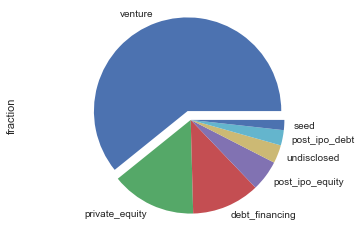

,raised_amount_usd,fraction
funding_round_type,,
venture,590126216876,59.601178
private_equity,141925436105,14.334092
debt_financing,113884840886,11.502066
post_ipo_equity,51610606151,5.212534
undisclosed,30441429697,3.074503
post_ipo_debt,25643094917,2.589884
seed,16989864181,1.715931


In [160]:
funding = rounds2.groupby('funding_round_type').sum().astype(np.int64).sort_values('raised_amount_usd', ascending=[False])[:7]
funding['fraction']=funding['raised_amount_usd']*100/rounds2['raised_amount_usd'].sum()
funding.fraction.plot(kind='pie', explode=(0.1,0,0,0,0,0,0))
plt.axis('equal')
plt.show()
funding

## Plot of top9 countries

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


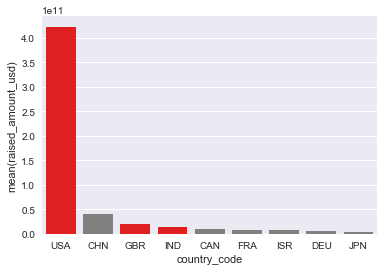

In [82]:
clrs = ['red' if (x in ['USA','IND','GBR']) else 'grey' for x in top9.index ]
sns.barplot(x=top9.index, y=top9.raised_amount_usd, palette=clrs) # color=clrs) 

## country-sectory wise and avg funding amount

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


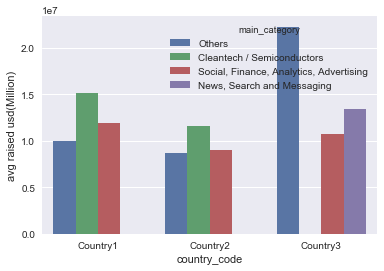

,country_code,main_category,value
0,Country1,Others,9963516
1,Country1,Cleantech / Semiconductors,15124712
2,Country1,"Social, Finance, Analytics, Advertising",11914353
3,Country2,Others,8705852
4,Country2,"Social, Finance, Analytics, Advertising",8962775
5,Country2,Cleantech / Semiconductors,11562585
6,Country3,Others,22286998
7,Country3,"Social, Finance, Analytics, Advertising",10740169
8,Country3,"News, Search and Messaging",13381384


In [83]:
df_bar = sorted_df[['raised_amount_usd_mean']].reset_index().melt(id_vars=["country_code", "main_category"])
g=sns.barplot(x="country_code", y="value", hue="main_category", data=df_bar)
plt.ylabel("avg raised usd(Million)")
plt.show(g)
 
df_bar[['country_code','main_category', 'value']]

## country-sectory wise and funding count

C:\Users\Naveen\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


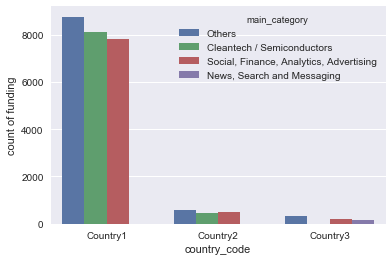

,country_code,main_category,value
0,Country1,Others,8763
1,Country1,Cleantech / Semiconductors,8121
2,Country1,"Social, Finance, Analytics, Advertising",7822
3,Country2,Others,580
4,Country2,"Social, Finance, Analytics, Advertising",481
5,Country2,Cleantech / Semiconductors,460
6,Country3,Others,332
7,Country3,"Social, Finance, Analytics, Advertising",193
8,Country3,"News, Search and Messaging",154


In [84]:
df_bar = sorted_df[['main_category_count']].reset_index().melt(id_vars=["country_code", "main_category"])
g=sns.barplot(x="country_code", y="value", hue="main_category", data=df_bar)
plt.ylabel("count of funding")
plt.show(g)

df_bar[['country_code','main_category', 'value']]